In [36]:
import os
count=0
for dirname, _, filenames in os.walk('/kaggle/input/plantvillage-dataset/color'): 
    print(dirname)
    count+=1
print(count-1)


/kaggle/input/plantvillage-dataset/color
/kaggle/input/plantvillage-dataset/color/Tomato___Late_blight
/kaggle/input/plantvillage-dataset/color/Tomato___healthy
/kaggle/input/plantvillage-dataset/color/Grape___healthy
/kaggle/input/plantvillage-dataset/color/Orange___Haunglongbing_(Citrus_greening)
/kaggle/input/plantvillage-dataset/color/Soybean___healthy
/kaggle/input/plantvillage-dataset/color/Squash___Powdery_mildew
/kaggle/input/plantvillage-dataset/color/Potato___healthy
/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Northern_Leaf_Blight
/kaggle/input/plantvillage-dataset/color/Tomato___Early_blight
/kaggle/input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot
/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
/kaggle/input/plantvillage-dataset/color/Strawberry___Leaf_scorch
/kaggle/input/plantvillage-dataset/color/Peach___healthy
/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab
/kaggle/input/plantvillage-dataset

IMPORTING LIBRARIES REQUIRED


In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [39]:
img_height = 224
img_width = 224

In [43]:
traindataset=image_dataset_from_directory("/kaggle/input/plantvillage-dataset/color",seed=13,image_size=(img_height,img_width), validation_split=0.2,subset="training")
validationdataset=image_dataset_from_directory("/kaggle/input/plantvillage-dataset/color",seed=13,image_size=(img_height,img_width), validation_split=0.2,subset="validation")

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [42]:
dataset.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

MODEL CREATION


importing libraries


In [45]:
from tensorflow.keras import layers
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [46]:
numberofclasses=38
model=Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)))


In [47]:
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(numberofclasses))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0         
                                                        

In [49]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

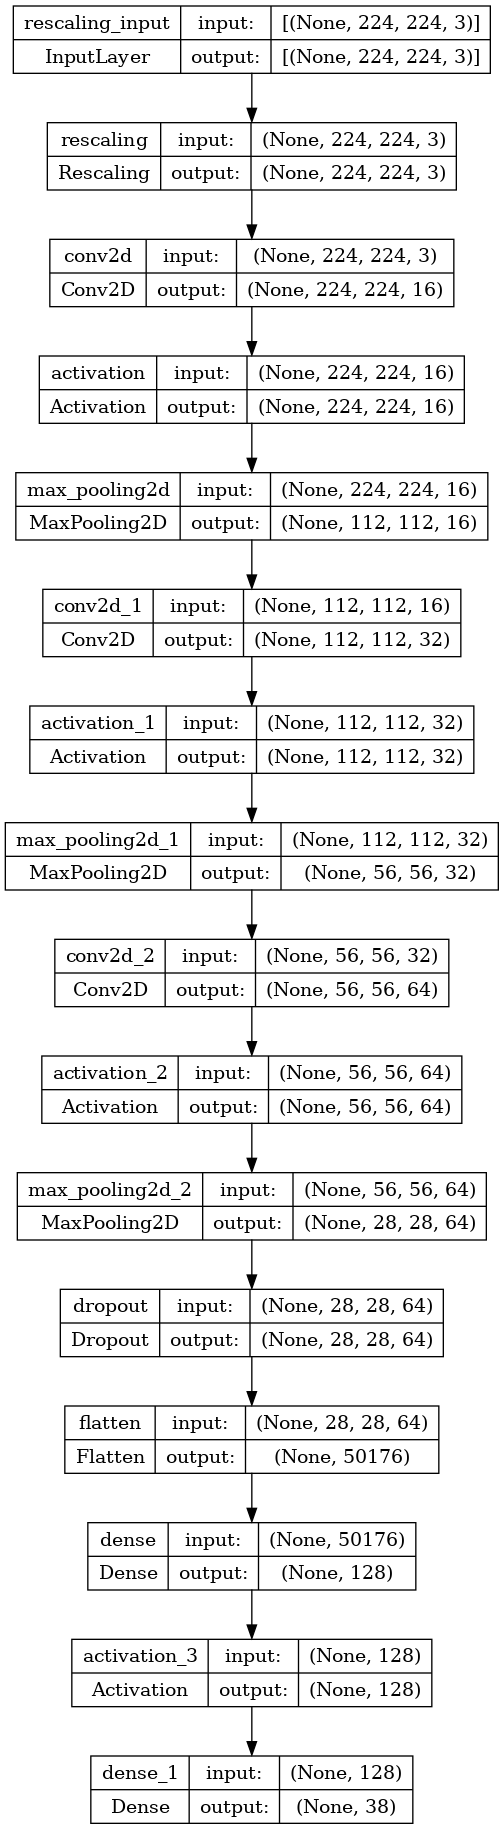

In [50]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [51]:
epochs = 10

history = model.fit(
  traindataset,
  validation_data=validationdataset,
  epochs=epochs
)

Epoch 1/10
1358/1358 [==============================] - 1356s 997ms/step - loss: 0.9905 - accuracy: 0.7148 - val_loss: 0.4518 - val_accuracy: 0.8565
Epoch 2/10
1358/1358 [==============================] - 1357s 999ms/step - loss: 0.3266 - accuracy: 0.8950 - val_loss: 0.3394 - val_accuracy: 0.8902
Epoch 3/10
1358/1358 [==============================] - 1350s 994ms/step - loss: 0.1833 - accuracy: 0.9392 - val_loss: 0.3932 - val_accuracy: 0.8919
Epoch 4/10
1358/1358 [==============================] - 1345s 990ms/step - loss: 0.1155 - accuracy: 0.9619 - val_loss: 0.3763 - val_accuracy: 0.9015
Epoch 5/10
1358/1358 [==============================] - 1336s 983ms/step - loss: 0.0909 - accuracy: 0.9691 - val_loss: 0.3699 - val_accuracy: 0.9030
Epoch 6/10
1358/1358 [==============================] - 1346s 991ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.4116 - val_accuracy: 0.9127
Epoch 7/10
1358/1358 [==============================] - 1340s 986ms/step - loss: 0.0604 - accuracy: 0.9803

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy: ",acc)
print("validation accuracy: ",val_acc)
print("loss: ",loss)
print("validation loss: ",val_loss)

accuracy:  [0.7147592306137085, 0.8949682116508484, 0.9392321109771729, 0.9619050025939941, 0.9690636396408081, 0.9762222766876221, 0.9803194999694824, 0.9814934134483337, 0.9845548272132874, 0.9841405153274536]
validation accuracy:  [0.8564589023590088, 0.8901574611663818, 0.8919067978858948, 0.901482343673706, 0.9029555320739746, 0.9127151966094971, 0.8885921835899353, 0.8967866897583008, 0.9033238291740417, 0.9132676720619202]
loss:  [0.9904524087905884, 0.32658258080482483, 0.18332552909851074, 0.11549193412065506, 0.09088501334190369, 0.07084431499242783, 0.06042918935418129, 0.05556294694542885, 0.04719023406505585, 0.05162950977683067]
validation loss:  [0.4518377482891083, 0.33937689661979675, 0.3931662142276764, 0.3762829303741455, 0.3699139952659607, 0.41162028908729553, 0.5691388845443726, 0.49889737367630005, 0.46725383400917053, 0.43607795238494873]


In [56]:
from tensorflow import expand_dims, newaxis
labels=traindataset.class_names
def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


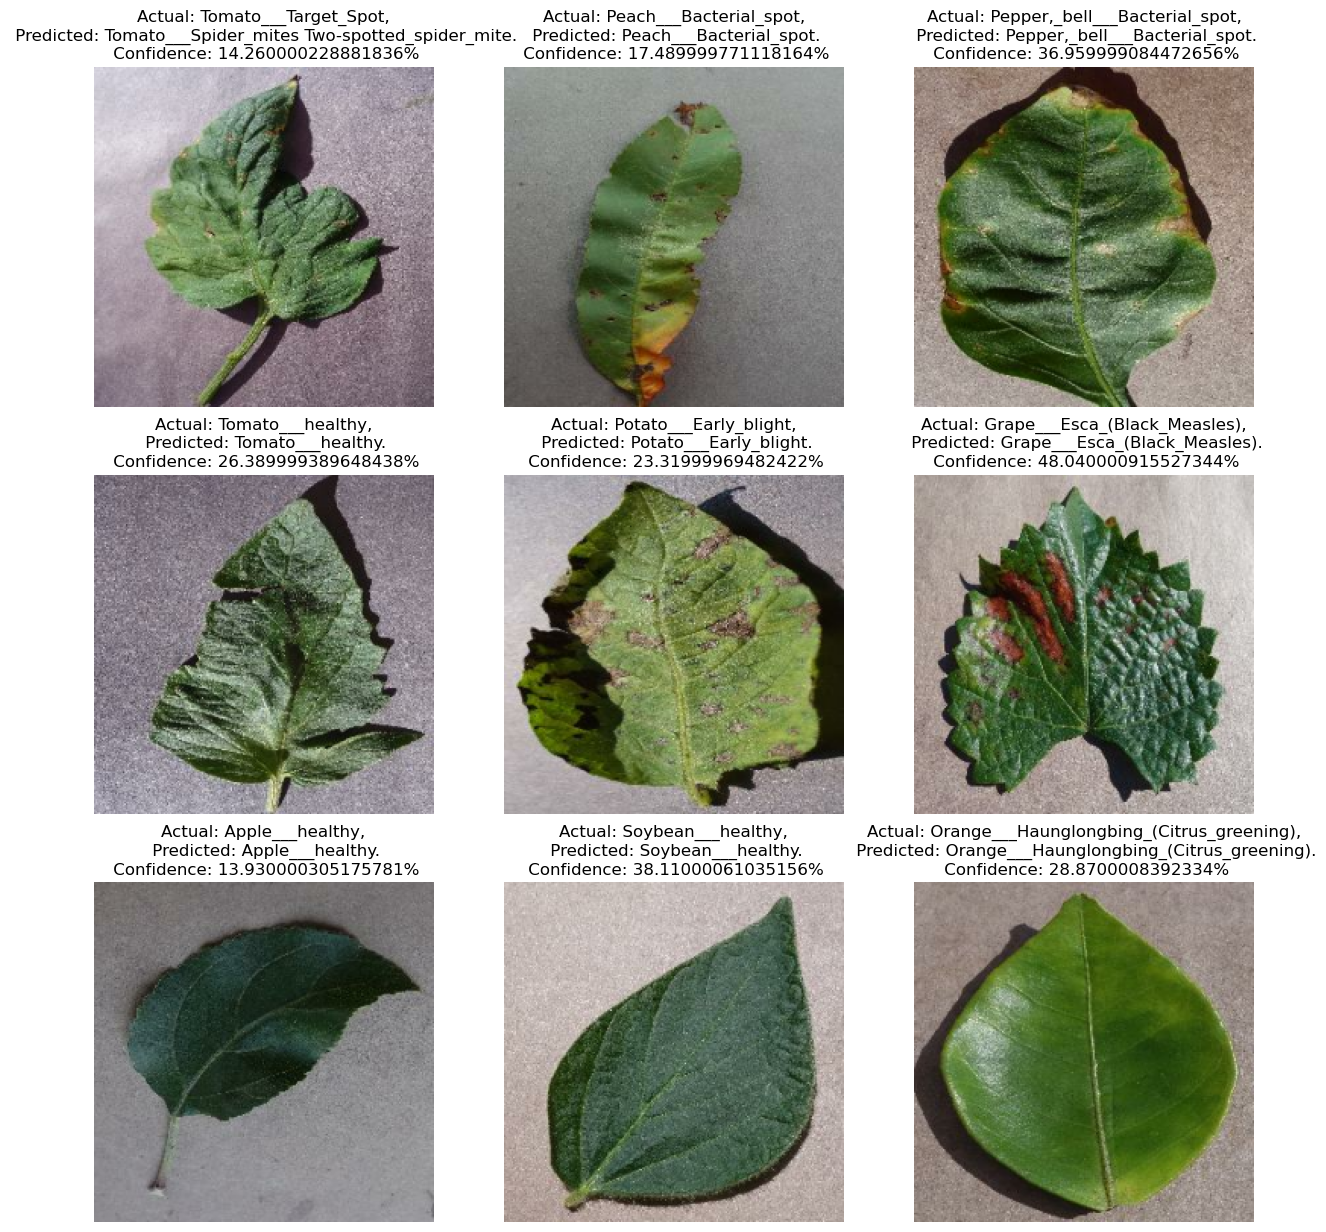

In [57]:
plt.figure(figsize=(15, 15))

for images, lbs in validationdataset.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")